In [2]:
#import

import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set(style='whitegrid', context='talk', font_scale=1)

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
from network_control.energies import minimum_input, optimal_input, sim_state_eq, integrate_u
from network_control.utils import matrix_normalization
from network_control.plotting import set_plotting_params, reg_plot
#set_plotting_params()

In [3]:
# load data
A = np.load('/Users/stiso/Downloads/Archive/A.npy')
A = matrix_normalization(A[:, :, 0], version='continuous')
n = np.shape(A)[0]

Normalizing A for a continuous-time system


## Minimum Energy

In [4]:
B = np.eye(n)
S = np.eye(n)
x0 = np.random.rand(n,) # this, as well as (n,1) should work
xf = np.random.rand(n,1)
T = 5
rho=1
m_x, m_u, n_err = minimum_input(A,T,B,x0,xf)
n_err

2.0544137969644886e-13

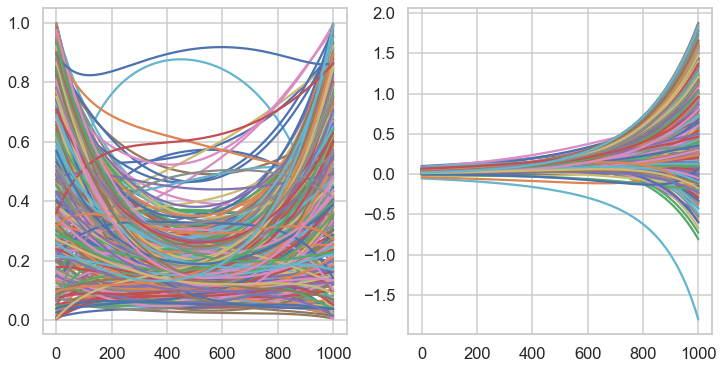

In [5]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(m_x)
ax[1].plot(m_u)
plt.show()

In [6]:
np.mean(integrate_u(m_u))
#np.mean(np.sum(o_u**2,0))

90.36318444853052

## Optimal Energy

In [7]:
o_x, o_u, n_err = optimal_input(A,T,B,x0,xf,rho,S)
n_err

1.1103192781766996e-11

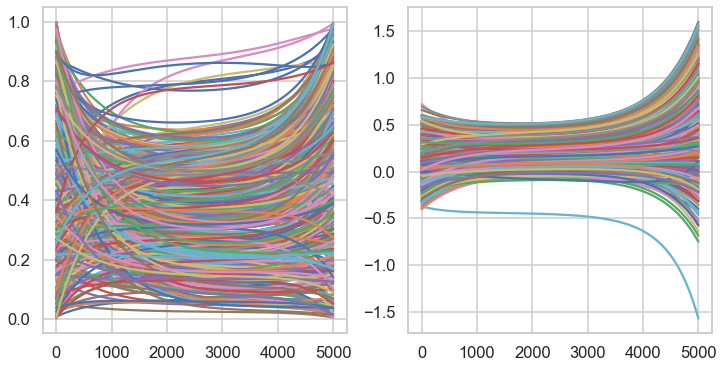

In [8]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(o_x)
ax[1].plot(o_u)
plt.show()

In [9]:
np.mean(integrate_u(o_u))
#np.mean(np.sum(o_u**2,0))

581.541062373976

### Minimum vs Optimal Energy

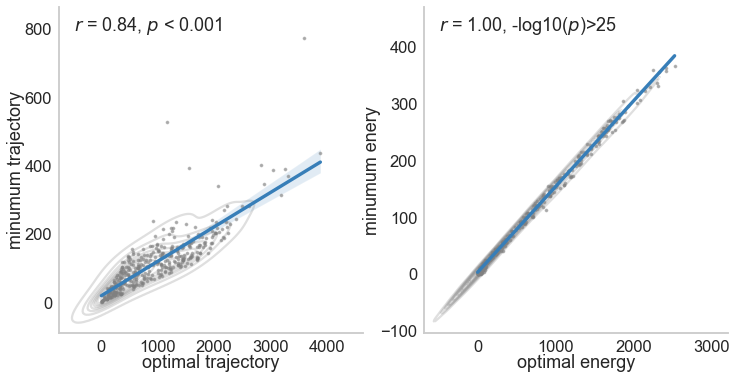

In [10]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
reg_plot(x=integrate_u(o_x), y=integrate_u(m_x), xlabel='optimal trajectory', ylabel='minumum trajectory', ax=ax[0])
reg_plot(x=integrate_u(o_u), y=integrate_u(m_u), xlabel='optimal energy', ylabel='minumum enery', ax=ax[1])
plt.show()

## Simulate State Equation

In [74]:
U = np.random.rand(n,100)
x = sim_state_eq( A, B, x0, U, version='continuous')

Simulating for a continuous-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


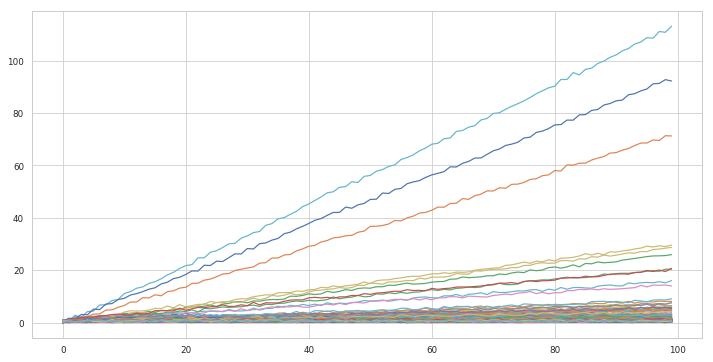

In [75]:
fig,ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(np.squeeze(x.T))
plt.show()

Normalizing A for a continuous-time system
Simulating for a continuous-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


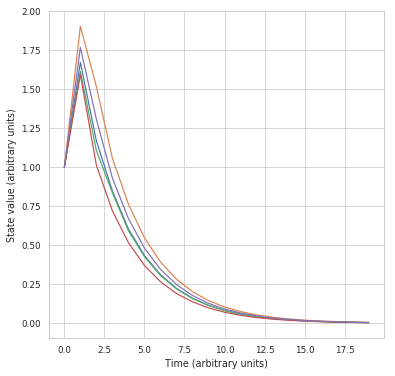

In [61]:
import numpy as np

# initialize matrix
np.random.seed(28)
A = np.random.rand(5,5)
from network_control.utils import matrix_normalization
A = matrix_normalization(A, c=1, version='continuous')
from network_control.energies import sim_state_eq
import matplotlib.pyplot as plt

U = np.zeros((5,20)) # the input to the system
U[:,0] = 1# impulse, 1 energy at the first time point
B = np.eye(5)
x0 = np.ones((5,))
x = sim_state_eq( A, B, x0, U, 'continuous')
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.squeeze(x.T))
plt.xlabel('Time (arbitrary units)')
plt.ylabel('State value (arbitrary units)')
plt.savefig('A_stable.png')
plt.show()

Simulating for a continuous-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


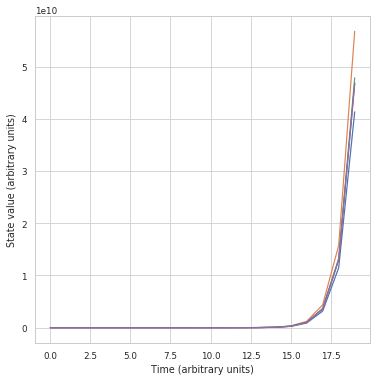

In [48]:
A_unstable = np.random.rand(5,5)
x = sim_state_eq( A_unstable, B, x0, U, version='continuous')
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.squeeze(x.T))
plt.xlabel('Time (arbitrary units)')
plt.ylabel('State value (arbitrary units)')
plt.savefig('A_unstable.png')
plt.show()

In [49]:
import numpy as np

# initialize matrix
np.random.seed(28)
A = np.random.rand(5,5)

In [51]:
from network_control.utils import matrix_normalization

A = matrix_normalization(A, c=1, version='discrete')
A

Normalizing A for a discrete-time system


array([[0.10869611, 0.08368095, 0.01863262, 0.05928111, 0.11649322],
       [0.07618916, 0.02723962, 0.12725895, 0.14244616, 0.14674644],
       [0.02873176, 0.14474576, 0.03500998, 0.00392936, 0.1410578 ],
       [0.13742937, 0.04383185, 0.02479144, 0.05895763, 0.07614097],
       [0.04592842, 0.06404881, 0.12376353, 0.083853  , 0.12388563]])

Simulating for a discrete-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


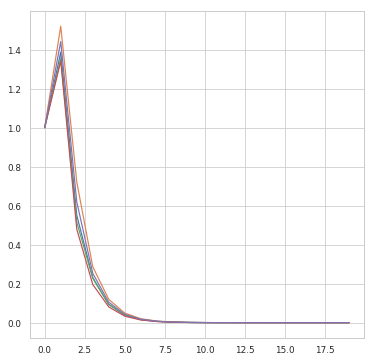

In [52]:
from network_control.energies import sim_state_eq
import matplotlib.pyplot as plt

U = np.zeros((5,20)) # the input to the system
U[:,0] = 1# impulse, 1 input at the first time point
B = np.eye(5)
x0 = np.ones((5,1))
x = sim_state_eq( A, B, x0, U, version='discrete')
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.squeeze(x.T))
plt.show()


Simulating for a discrete-time system


/Users/stiso/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Public Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


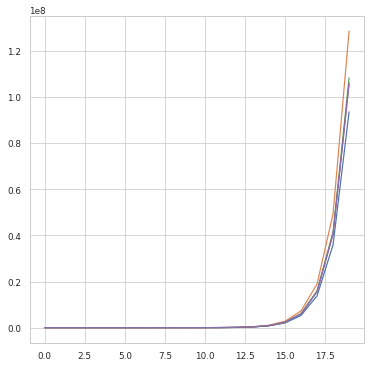

In [53]:
A_unstable = np.random.rand(5,5)
x = sim_state_eq( A_unstable, B, x0, U, version='discrete')
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(np.squeeze(x.T))
plt.show()

In [55]:
from network_control.metrics import ave_control

ac = ave_control(A)
ac

array([1.04035989, 1.062006  , 1.04213726, 1.03072016, 1.04919783])

In [56]:
from network_control.metrics import modal_control

mc = modal_control(A)
mc

array([0.96598287, 0.94806012, 0.96402605, 0.97390307, 0.95859984])

In [57]:
from network_control.energies import minimum_input

A_cont = matrix_normalization(A, c=1, version='continuous')
# define states and time horizon
x0 = np.random.rand(5,1)
xf = np.random.rand(5,1)
T = 5
x, u, n_err = minimum_input(A_cont,T,B,x0,xf)
n_err

Normalizing A for a continuous-time system


2.1096063413561365e-15

In [58]:
# sparse B
B_sparse = np.zeros((5,5))
B_sparse[0,0] = 1
x, u, n_err = minimum_input(A_cont,T,B_sparse,x0,xf)
n_err



2.1916886312340582e-05

In [59]:
from network_control.energies import integrate_u

energy = integrate_u(u)
np.mean(energy)

1406708439148.7031

In [60]:
from network_control.energies import optimal_input

# new parameters
rho = 1
S = np.eye(5)
x, u, n_err = optimal_input(A_cont,T,B,x0,xf,rho,S)
n_err

2.4341274590567305e-13